In [8]:
abstract type Defect end

mutable struct Sia <: Defect 
    coord::Vector{Int64}
    function Sia()
        coord = rand(1:10,2)
        new(coord)
    end
end

mutable struct Vac <: Defect 
    coord::Vector{Int64}
    function Vac()
        coord = rand(1:10,2)
        new(coord)
    end
end

In [80]:
sias = [Sia() for _ in 1:10000]
vacs = [Vac() for _ in 1:10000]

10000-element Vector{Vac}:
 Vac([1, 8])
 Vac([7, 4])
 Vac([4, 1])
 Vac([2, 1])
 Vac([1, 2])
 Vac([5, 1])
 Vac([3, 5])
 Vac([4, 7])
 Vac([9, 1])
 Vac([3, 5])
 ⋮
 Vac([10, 3])
 Vac([8, 5])
 Vac([5, 8])
 Vac([6, 4])
 Vac([7, 8])
 Vac([8, 8])
 Vac([7, 1])
 Vac([9, 6])
 Vac([10, 3])

In [4]:
function Move_fast(defect::Defect)    
    defect.coord = rand(1:10,2)
end
function Move_slow(defect::T) where {T <: Defect}
    defect.coord = rand(1:10,2)
end
function MoveSia(sia::Sia)
    sia.coord = rand(1:10,2)
end
function MoveVac(vac::Vac)
    vac.coord = rand(1:10,2)
end

MoveVac (generic function with 1 method)

In [76]:
function test3(sias::Vector{Sia}, vacs::Vector{Vac})
    for sia in sias
        MoveSia(sia)
    end
    for vac in vacs
        MoveVac(vac)
    end
end

test3 (generic function with 2 methods)

In [79]:
@benchmark test3(sias, vacs)

BenchmarkTools.Trial: 5434 samples with 1 evaluation.
 Range (min … max):  590.800 μs …  11.512 ms  ┊ GC (min … max):  0.00% … 72.28%
 Time  (median):     631.900 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   912.952 μs ± 793.518 μs  ┊ GC (mean ± σ):  14.42% ± 15.22%

  █▅▄▃▂▂▁  ▂▃▄▁                                                 ▁
  ████████▇█████▇▇▆▃▄▃▄▆▆▅▅▄▇▆▄▅▄▄▅▃▃▃▃▁▁▁▁▁▁▁▁▁██▇▆▆▅▅▄▄▅▃▃▅▅▅ █
  591 μs        Histogram: log(frequency) by time       4.82 ms <

 Memory estimate: 1.53 MiB, allocs estimate: 20000.

In [12]:
using BenchmarkTools

In [81]:
function test(sias::Vector{Sia}, vacs::Vector{Vac}) ### most convient and efficiecy version 
    for sia in sias
        Move_fast(sia)
    end
    for vac in vacs
        Move_fast(vac)
    end
end

test (generic function with 1 method)

In [82]:
@benchmark test(sias,vacs)

BenchmarkTools.Trial: 5621 samples with 1 evaluation.
 Range (min … max):  593.600 μs …   8.610 ms  ┊ GC (min … max):  0.00% …  0.00%
 Time  (median):     652.300 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   881.023 μs ± 827.419 μs  ┊ GC (mean ± σ):  16.62% ± 15.56%

  █▅▄▃▃▂▁▂▂▂                                                    ▁
  ███████████▇▇▆▄▃▃▄▅▆▃▃▃▄▄▁▁▁▃▁▁▁▁▁▁▁▃▁▁▁▁▁▆█▇▆▅▄▄▅▃▅▃▆▆▆▆▅▅▆▅ █
  594 μs        Histogram: log(frequency) by time       5.32 ms <

 Memory estimate: 1.53 MiB, allocs estimate: 20000.

In [29]:
@code_warntype test(sias,vacs)

MethodInstance for test(::Vector{Sia}, ::Vector{Vac})
  from test(sias::Vector{Sia}, vacs::Vector{Vac}) in Main at /home/xuke/Researches/OKMC.jl/test.ipynb:1
Arguments
  #self#::Core.Const(test)
  sias::Vector{Sia}
  vacs::Vector{Vac}
Locals
  @_4::Union{Nothing, Tuple{Vac, Int64}}
  @_5::Union{Nothing, Tuple{Sia, Int64}}
  sia::Sia
  vac::Vac
Body::Nothing
1 ─       Core.NewvarNode(:(@_4))
│   %2  = sias::Vector{Sia}
│         (@_5 = Base.iterate(%2))
│   %4  = (@_5 === nothing)::Bool
│   %5  = Base.not_int(%4)::Bool
└──       goto #4 if not %5
2 ┄ %7  = @_5::Tuple{Sia, Int64}
│         (sia = Core.getfield(%7, 1))
│   %9  = Core.getfield(%7, 2)::Int64
│         Main.Move_slow(sia)
│         (@_5 = Base.iterate(%2, %9))
│   %12 = (@_5 === nothing)::Bool
│   %13 = Base.not_int(%12)::Bool
└──       goto #4 if not %13
3 ─       goto #2
4 ┄ %16 = vacs::Vector{Vac}
│         (@_4 = Base.iterate(%16))
│   %18 = (@_4 === nothing)::Bool
│   %19 = Base.not_int(%18)::Bool
└──       goto #7 if n

In [53]:
mutable struct Adefect
    type::UInt8
    coord::Vector{Int64}
    function Adefect()
        type = rand(UInt8(1):UInt8(2))
        coord = rand(1:10,2)
        new(type,coord)
    end
end

In [61]:
defects = [Adefect() for _ in 1:20000]

20000-element Vector{Adefect}:
 Adefect(0x01, [3, 2])
 Adefect(0x02, [4, 5])
 Adefect(0x02, [2, 3])
 Adefect(0x01, [8, 6])
 Adefect(0x02, [7, 6])
 Adefect(0x02, [3, 10])
 Adefect(0x02, [9, 5])
 Adefect(0x02, [7, 7])
 Adefect(0x01, [5, 7])
 Adefect(0x02, [7, 2])
 ⋮
 Adefect(0x01, [10, 7])
 Adefect(0x01, [5, 9])
 Adefect(0x02, [1, 8])
 Adefect(0x01, [2, 4])
 Adefect(0x02, [7, 6])
 Adefect(0x02, [10, 3])
 Adefect(0x01, [7, 7])
 Adefect(0x02, [6, 10])
 Adefect(0x02, [6, 6])

In [58]:
function test2(defects::Vector{Adefect})
    for defect in defects
        if defect.type === UInt8(1)
            Move(defect)
        else
            Move(defect)
        end
    end
end

test2 (generic function with 1 method)

In [59]:
function Move(defect::Adefect)
    if defect.type === UInt8(1)
        defect.coord = rand(1:10,2)
    else
        defect.coord = rand(10:20,2)
    end
end

Move (generic function with 2 methods)

In [62]:
@benchmark test2(defects)

BenchmarkTools.Trial: 5360 samples with 1 evaluation.
 Range (min … max):  663.300 μs …   7.431 ms  ┊ GC (min … max):  0.00% … 83.28%
 Time  (median):     716.300 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   925.956 μs ± 687.252 μs  ┊ GC (mean ± σ):  12.87% ± 14.74%

  █▆▅▃▃▂▂▁▁  ▂▂                                                 ▁
  ██████████▇████▆▆▆▁▁▁▃▄▆▆▃▃▁▁▄▁▁▃▃▁▁▁▁▁▁▁▁▁▁▄██▇▆▆▅▅▅▅▄▄▁▄▅▅▅ █
  663 μs        Histogram: log(frequency) by time       4.58 ms <

 Memory estimate: 1.53 MiB, allocs estimate: 20000.

### conclusion
* Multiple dispatch can be fast if objects stored separately

#### Macro test

In [35]:
macro iter_defect(ex, args...)
    return quote
        for sia in sias
            $ex(sia, $(args...))
        end
        for vac in vacs
            $ex(vac, $(args...))
        end
    end
end

macro iter_sia(ex)
    return quote
        for sia in sias
            $ex(sia)
        end
    end
end

macro iter_vac(ex)
    return quote
        for vac in vacs
            $ex(vac)
        end
    end
end


@iter_vac (macro with 1 method)

In [12]:
abstract type Defect end

mutable struct Sia <: Defect 
    coord::Vector{Int64}
    function Sia()
        coord = rand(1:10,2)
        new(coord)
    end
end

mutable struct Vac <: Defect 
    coord::Vector{Int64}
    function Vac()
        coord = rand(1:10,2)
        new(coord)
    end
end

sias = [Sia() for _ in 1:10000]
vacs = [Vac() for _ in 1:10000]

10000-element Vector{Vac}:
 Vac([7, 7])
 Vac([5, 5])
 Vac([3, 3])
 Vac([1, 1])
 Vac([10, 8])
 Vac([8, 8])
 Vac([9, 6])
 Vac([2, 6])
 Vac([7, 7])
 Vac([7, 10])
 ⋮
 Vac([4, 7])
 Vac([1, 8])
 Vac([10, 5])
 Vac([9, 7])
 Vac([3, 1])
 Vac([5, 5])
 Vac([4, 3])
 Vac([4, 8])
 Vac([8, 2])

In [38]:
function Displace(defect::Defect, coord::Vector{Int64})
    defect.coord = coord
end

function Displace2(defect::Defect, coord::Vector{Int64}, coord2::Vector{Int64})
    defect.coord = coord
    defect.coord = coord2
end

Displace2 (generic function with 1 method)

In [40]:
coord = [1,1]
coord2 = [2,2]
@iter_defect Displace2 coord coord2

In [42]:
using StaticArrays

In [50]:
a  = SA[1,2,3]

3-element SVector{3, Int64} with indices SOneTo(3):
 1
 2
 3

In [51]:
a isa SVector{3,Int64}

true

In [56]:
a[1] =2

ErrorException: setindex!(::SVector{3, Int64}, value, ::Int) is not defined.

In [52]:
mutable struct Point
    coord::Int64
    function Point()
        coord = rand(Int64(1):Int64(10))
        new(coord)
    end
end

In [58]:
Point()
using StatsBase

In [59]:
sample([1,2,3])

2

In [60]:
Int64 <: Union{Int64, Float64}

true

In [63]:
a = [1,2,3]
a .-= 1

3-element Vector{Int64}:
 0
 1
 2

In [64]:
sample([])

ArgumentError: ArgumentError: range must be non-empty

In [66]:
a = Vector{Vector{Int64}}()

Vector{Int64}[]

In [67]:
x = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [71]:
push!(a,x)

3-element Vector{Vector{Int64}}:
 [1, 2, 3]
 [1, 2, 3]
 [1, 2, 3]

In [3]:
foo(x::Int64) = x+1
bar(x::Int64) = x-1

bar (generic function with 2 methods)

In [4]:
fs = [foo,bar]

2-element Vector{Function}:
 foo (generic function with 2 methods)
 bar (generic function with 2 methods)

In [19]:
function test(x::Int64, f::Function)
    n = rand(1:2)
    f(x)
    return 2
end

test (generic function with 2 methods)

In [17]:
x = 10

10

In [20]:
@code_warntype test(x,foo)

MethodInstance for test(::Int64, ::typeof(foo))
  from test(x::Int64, f::Function) in Main at /home/xuke/Researches/OKMC.jl/test/test.ipynb:1
Arguments
  #self#::Core.Const(test)
  x::Int64
  f::Core.Const(foo)
Locals
  n::Int64
Body::Int64
1 ─ %1 = (1:2)::Core.Const(1:2)
│        (n = Main.rand(%1))
│        (f)(x)
└──      return 2



In [13]:
function myforeach(f::Function, xs::Vector{Int64})
    for x in xs
        f(x)
    end
end

myforeach (generic function with 2 methods)

In [24]:
function test1(x::Int64, f::Function)
    f(x)
end

test1 (generic function with 1 method)

In [25]:
@code_warntype test1(x,foo)

MethodInstance for test1(::Int64, ::typeof(foo))
  from test1(x::Int64, f::Function) in Main at /home/xuke/Researches/OKMC.jl/test/test.ipynb:1
Arguments
  #self#::Core.Const(test1)
  x::Int64
  f::Core.Const(foo)
Body::Int64
1 ─ %1 = (f)(x)::Int64
└──      return %1



In [30]:
function test2(fs::Vector{Function}, x::Int64)
    fs[1]
end

test2 (generic function with 1 method)

In [31]:
@code_warntype test2(fs,x)

MethodInstance for test2(::Vector{Function}, ::Int64)
  from test2(fs::Vector{Function}, x::Int64) in Main at /home/xuke/Researches/OKMC.jl/test/test.ipynb:1
Arguments
  #self#::Core.Const(test2)
  fs::Vector{Function}
  x::Int64
Body::Function
1 ─ %1 = Base.getindex(fs, 1)::Function
└──      return %1



In [32]:
a = 3

3

In [37]:
const b = a*2

6

In [41]:
[a for a in Int64[1,2,3,4] if a != 2]

3-element Vector{Int64}:
 1
 3
 4

In [46]:
rand(0.0:2.0)

0.0

In [49]:
using Distributions

In [52]:
y(x) = rand(Uniform(0.0,2.0))

y (generic function with 1 method)

In [53]:
@code_warntype y(1)

MethodInstance for y(::Int64)
  from y(x) in Main at /home/xuke/Researches/OKMC.jl/test/test.ipynb:1
Arguments
  #self#::Core.Const(y)
  x::Int64
Body::Float64
1 ─ %1 = Main.Uniform(0.0, 2.0)::Core.Const(Uniform{Float64}(a=0.0, b=2.0))
│   %2 = Main.rand(%1)::Float64
└──      return %2



In [1]:
using PlotlyJS

In [24]:
function RandomAPointOnShpereSurface(r::Float64=1.0)
    # pick a random point on a sphere surface uniformly
    # http://mathworld.wolfram.com/SpherePointPicking.html
    u = rand()*2-1
    theta = 2pi*rand()
    x = sqrt(1-u*u) * cos(theta)
    y = sqrt(1-u*u) * sin(theta)
    z = u
    return x,y,z
end

RandomAPointOnShpereSurface (generic function with 2 methods)

In [28]:
xs = Float64[]
ys = Float64[]
zs = Float64[]
for _ in 1:1000
    x, y, z = RandomAPointOnShpereSurface()
    push!(xs,x)
    push!(ys,y)
    push!(zs,z)
end

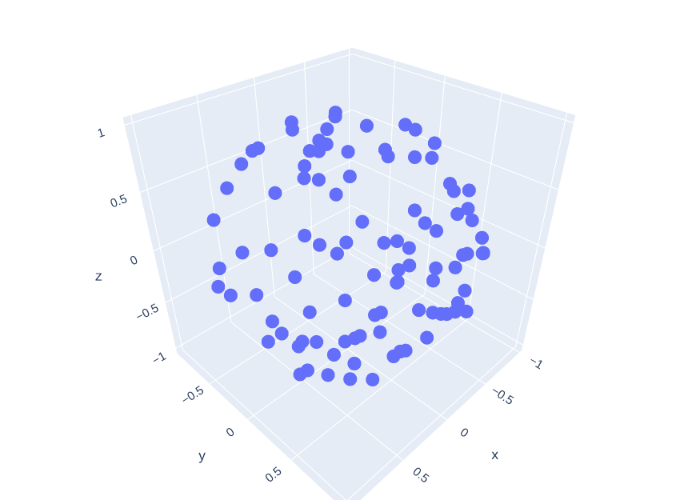

In [27]:
plot(scatter(x=xs, y=ys, z=zs, type="scatter3d",mode="markers", marker=attr(size=1)), Layout(margin=attr(l=0, r=0, b=0, t=0)))

In [8]:
# Helix equation
t = range(0, stop=20, length=100)

plot(scatter(
    x=cos.(t),
    y=sin.(t),
    z=t,
    mode="markers",
    marker=attr(
        size=12,
        color=t,                # set color to an array/list of desired values
        colorscale="Viridis",   # choose a colorscale
        opacity=0.8
    ),
    type="scatter3d"
), Layout(margin=attr(l=0, r=0, b=0, t=0)))